# Causal inference in multisensory perception
### Paola Suárez and Jiameng Wu

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats.distributions as dists
import itertools
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

## 1. Implement the model

### Probability of a common cause

In [36]:
# Default parameters
p_com0 = 0.8
sigma_v0 = 0.6
sigma_a0 = 3.1
sigma_p0 = 15
mu_p = 0

In [37]:
def prob_C1(x_v, x_a, sigma_v=sigma_v0, sigma_a=sigma_a0, sigma_p=sigma_p0, p_com=p_com0, mu_p=mu_p):
    """
    Inference of the ideal observer of the probability of a common cause given noisy stimuli p(C = 1|xv,xa)
    """
    denominator = ( sigma_v**2 * sigma_a**2 + \
                    sigma_v**2 * sigma_p**2 + \
                    sigma_a**2 * sigma_p**2 )
    
    cond_C1 = np.exp(-.5 * \
                         ((x_v - x_a)**2 * sigma_p**2 + \
                          (x_v - mu_p)**2 * sigma_a**2 + \
                          (x_a - mu_p)**2 * sigma_v**2) / \
                         denominator) / \
              (2*np.pi*np.sqrt(denominator))
        
    cond_C2 = np.exp(-.5 * \
                        ((x_v - mu_p)**2 / (sigma_v**2 + sigma_p**2) + \
                         (x_a - mu_p)**2 / (sigma_a**2 + sigma_p**2))) / \
              (2*np.pi*np.sqrt( \
                          (sigma_v**2 + sigma_p**2) * \
                          (sigma_a**2 + sigma_p**2)))
        
    p_C1 = cond_C1 * p_com / (cond_C1 * p_com + cond_C2 * (1-p_com))
    
    return p_C1, x_v-x_a

In [38]:
# Position values
pos = np.array([-12, -6, 0, 6, 12])

In [39]:
# Noisy stimuli
n = 10
x = np.linspace(pos.min(), pos.max(), n*(pos.max() - pos.min())+1)
x_v, x_a = np.meshgrid(x, x)
x_v = x_v.reshape(len(x)**2)
x_a = x_a.reshape(len(x)**2)

In [40]:
# Obtain probs
p_C1s, disparity = prob_C1(x_v, x_a)

In [41]:
p_C1s.shape

(58081,)

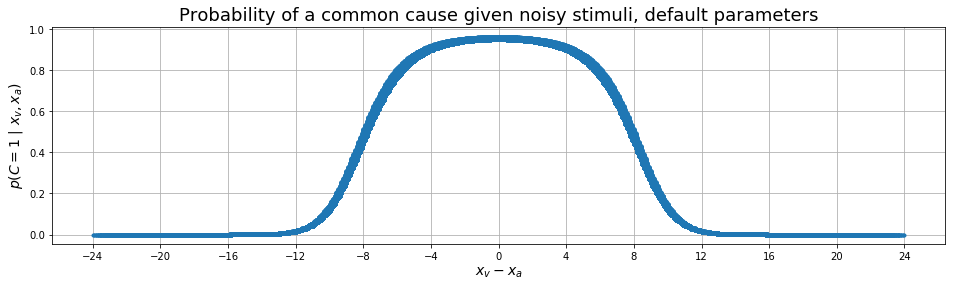

In [42]:
# Visualize
plt.figure(figsize=(16,4))
plt.plot(disparity, p_C1s, '.')
plt.title("Probability of a common cause given noisy stimuli, default parameters", size=18)
plt.xlabel(r'$x_v - x_a$', size=14)
plt.ylabel(r'$p(C=1\ |\ x_v, x_a)$', size=14)
plt.xticks(np.linspace(2*pos.min(),2*pos.max(),13))
plt.grid()
plt.show()

### Change parameters and explain

In [43]:
# Vary p_com separately
p_C1s_v1 = []
p_coms = np.linspace(0, 1, 6)
for p_com in p_coms:
    p_C1s, disparity = prob_C1(x_v, x_a, p_com=p_com)
    p_C1s_v1.append(p_C1s)
    
# Vary sigma_v separately
p_C1s_v2 = []
sigma_vs = [0.1, 0.5,  1., 3., 5.]
for sigma_v in sigma_vs:
    p_C1s, disparity = prob_C1(x_v, x_a, sigma_v=sigma_v)
    p_C1s_v2.append(p_C1s)
    
# Vary sigma_a separately
p_C1s_v3 = []
sigma_as = [0.1, 1.5, 3.5, 5.5]
for sigma_a in sigma_as:
    p_C1s, disparity = prob_C1(x_v, x_a, sigma_a=sigma_a)
    p_C1s_v3.append(p_C1s)
    
# Vary sigma_p separately
p_C1s_v4 = []
sigma_ps = [0.5, 1, 5, 10, 15, 24]
for sigma_p in sigma_ps:
    p_C1s, disparity = prob_C1(x_v, x_a, sigma_p=sigma_p)
    p_C1s_v4.append(p_C1s)

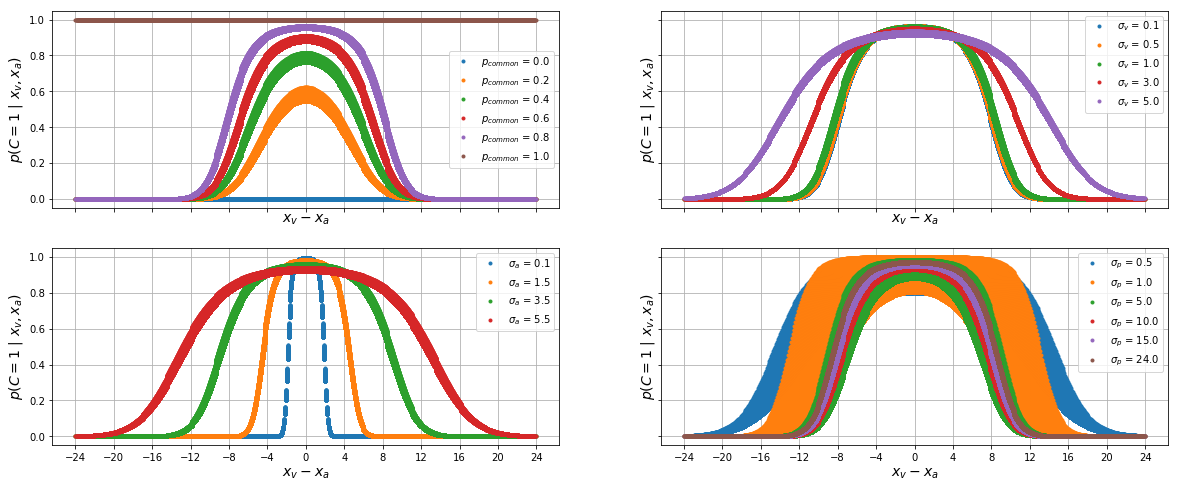

In [44]:
# Visualize
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(20,8))
axes = axes.ravel()
params = [p_coms, sigma_vs, sigma_as, sigma_ps]
labels = [r'$p_{common}$', r'$\sigma_v$', r'$\sigma_a$', r'$\sigma_p$']
for j, p_C1s_v in enumerate([p_C1s_v1, p_C1s_v2, p_C1s_v3, p_C1s_v4]):
    for i, p_C1s in enumerate(p_C1s_v):
        axes[j].plot(disparity, p_C1s, '.', label=str(labels[j])+" = %.1f"%params[j][i])
    #axes[j].set_title("Probability of a common cause given noisy stimuli, change sigma_a", size=18)
    axes[j].set_xlabel(r'$x_v - x_a$', size=14)
    axes[j].set_ylabel(r'$p(C=1\ |\ x_v, x_a)$', size=14)
    axes[j].set_xticks(np.linspace(2*pos.min(),2*pos.max(),13))
    axes[j].legend()
    axes[j].grid()
plt.show()

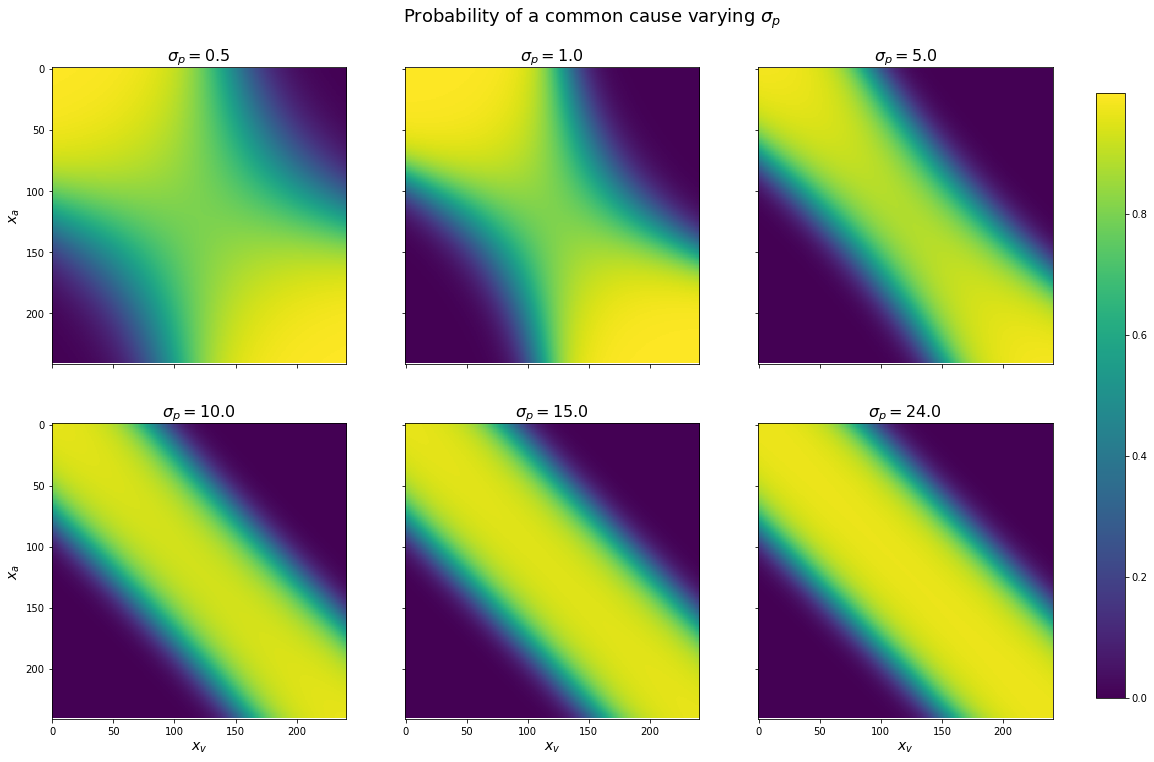

In [45]:
# What is happening with sigma_p?
vmin, vmax = np.min(p_C1s_v4), np.max(p_C1s_v4)

fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(20,12))
axes = axes.ravel()
for i, p_C1s in enumerate(p_C1s_v4):
    p_C1s = p_C1s.reshape(len(x), len(x))
    axes[i].imshow(p_C1s, vmin=vmin, vmax=vmax)
    axes[i].set_title(r"$\sigma_p = %.1f$" %sigma_ps[i], size=16)
    if i in {0, 3}:
        axes[i].set_ylabel(r"$x_a$", size=14)
    if i in {3, 4, 5}:
        axes[i].set_xlabel(r"$x_v$", size=14)

fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
norm =  colors.Normalize(vmin=vmin, vmax=vmax)
s_m =  cm.ScalarMappable(norm=norm)
s_m.set_array(np.linspace(vmin, vmax))
fig.colorbar(s_m, cax=cbar_ax)

fig.suptitle(r"Probability of a common cause varying $\sigma_p$", size=18, y=0.95)
plt.show()

Read the paper for interpretation.

sigma = 0 does't make sense ---> prob is going to be p_com

### Estimate stimulus position

In [46]:
def estimates(x_v, x_a, sigma_v=sigma_v0, sigma_a=sigma_a0, sigma_p=sigma_p0, p_com=p_com0):
    """
    The optimal estimate of the stimuli's position is the one that minimizes the mean expected squared error.
    """
    p_C1, _ = prob_C1(x_v, x_a, sigma_v, sigma_a, sigma_p, p_com)
    
    s_v_C1 = (x_v/sigma_v**2 + x_a/sigma_a**2 + mu_p/sigma_p**2) / \
             (1/sigma_v**2 + 1/sigma_a**2 + 1/sigma_p**2)
            
    s_a_C1 = s_v_C1
    
    s_v_C2 = (x_v/sigma_v**2 + mu_p/sigma_p**2) / \
             (1/sigma_v**2 + 1/sigma_p**2)
        
    s_a_C2 = (x_a/sigma_a**2 + mu_p/sigma_p**2) / \
             (1/sigma_a**2 + 1/sigma_p**2)
    
    est_v = p_C1 * s_v_C1 + (1 - p_C1)*s_v_C2
    est_a = p_C1 * s_a_C1 + (1 - p_C1)*s_a_C2
    
    return est_v, est_a

In [47]:
# Assume x_a is fixed at 0
x_a = 0
x_v = x.copy()

est_v, est_a = estimates(x_v, x_a)

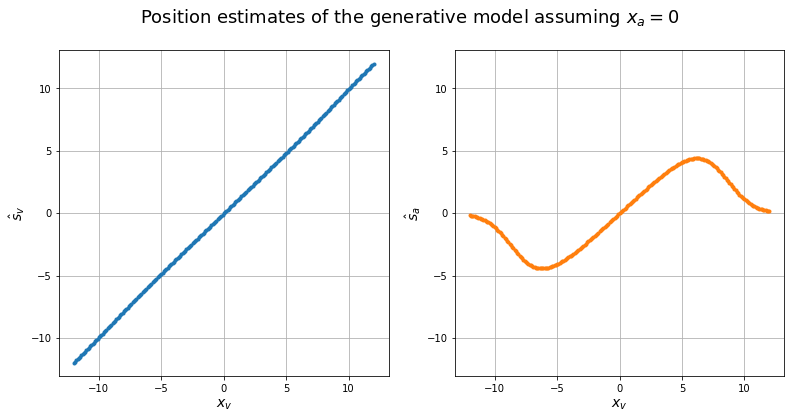

In [48]:
# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,6))
fig.suptitle(r"Position estimates of the generative model assuming $x_a=0$", size=18)
ax1.plot(x_v, est_v, '.C0')
ax1.axis('equal')
ax1.set_xlabel(r'$x_v$', size=14)
ax1.set_ylabel(r'$\hat{s}_v$', size=14)
ax1.grid()

ax2.plot(x_v, est_a, '.C1')
ax2.axis('equal')
ax2.set_xlabel(r'$x_v$', size=14)
ax2.set_ylabel(r'$\hat{s}_a$', size=14)
ax2.grid()
plt.show()

In [49]:
# Vary p_com separately
estims_v1 = []
p_coms = np.linspace(0, 1, 6)
for p_com in p_coms:
    est_v, est_a = estimates(x_v, x_a, p_com=p_com)
    estims_v1.append([est_v, est_a])
    
# Vary sigma_v separately
estims_v2 = []
sigma_vs = [0.1, 0.5,  1., 3., 5.]
for sigma_v in sigma_vs:
    est_v, est_a = estimates(x_v, x_a, sigma_v=sigma_v)
    estims_v2.append([est_v, est_a])
    
# Vary sigma_a separately
estims_v3 = []
sigma_as = [0.1, 1.5, 3.5, 5.5]
for sigma_a in sigma_as:
    est_v, est_a = estimates(x_v, x_a, sigma_a=sigma_a)
    estims_v3.append([est_v, est_a])
    
# Vary sigma_p separately
estims_v4 = []
sigma_ps = [0.5, 1, 5, 10, 15, 24]
for sigma_p in sigma_ps:
    est_v, est_a = estimates(x_v, x_a, sigma_p=sigma_p)
    estims_v4.append([est_v, est_a])

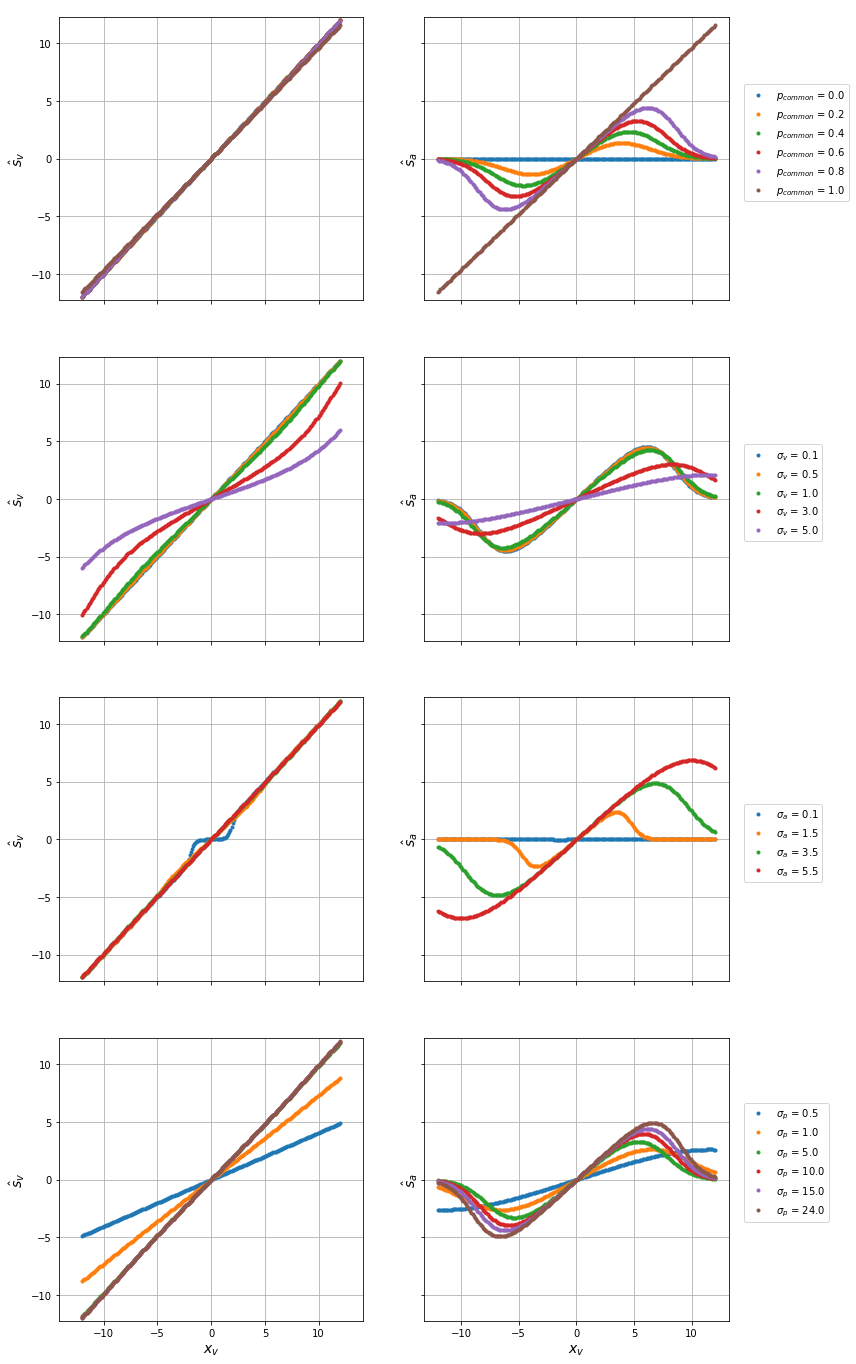

In [50]:
# Visualize
fig, axes = plt.subplots(4, 2, sharex="col", sharey=True, figsize=(12,24))
#axes = axes.ravel()
params = [p_coms, sigma_vs, sigma_as, sigma_ps]
labels = [r'$p_{common}$', r'$\sigma_v$', r'$\sigma_a$', r'$\sigma_p$']
for j, estims in enumerate([estims_v1, estims_v2, estims_v3, estims_v4]):
    for i, (est_v, est_a) in enumerate(estims):
        axes[j,0].plot(x_v, est_v, '.', label=str(labels[j])+" = %.1f"%params[j][i])
        axes[j,1].plot(x_v, est_a, '.', label=str(labels[j])+" = %.1f"%params[j][i])
    axes[j,0].set_ylabel(r'$\hat{s}_v$', size=14)
    axes[j,1].set_ylabel(r'$\hat{s}_a$', size=14)
    axes[j,0].axis('equal')
    axes[j,1].axis('equal')
    axes[j,1].legend(loc=(1.05, 0.35))
    #axes[j,1].legend()
    axes[j,0].grid()
    axes[j,1].grid()
axes[j,0].set_xlabel(r'$x_v$', size=14)
axes[j,1].set_xlabel(r'$x_v$', size=14)
plt.show()

sigma_p = 0.1 is almost a flat line. As we saw before, the smaller the sigma_p, the common cause will be 0.8.
The smaller the value, the estimate is going to be more centrally located at the middle. And viceversa.

sigma_v and sigma_a determine how sure you're about your perception. The smaller determines which one you're more sure, the broader the least accurate your estimation.

### Predicted distribution of visual positions through marginalization

#### How you might evaluate the integral $p(\hat{s}_v | s_v, s_a) = \int\int p(\hat{s}_v | x_v, x_a) p(x_v | s_v) p(x_a | s_a) dx_v dx_a$ ?

#### What kind of function is $p(\hat{s}_v | x_v, x_a)$ ? How does it affect the analytical evaluation of the integral?

In this paper we correctly deal with this issue by marginalizing over the latent variables x_a and x_v

These response distributions were obtained through simulation.

We need to simulate!

### Numerical method for obtaining estimates

In [93]:
sigma_v0 = 0.6
samples = 1000
x_v = np.random.normal(pos, sigma_v0, size=(samples,len(pos)))#.reshape(samples*len(pos))
x_a = np.random.normal(0, sigma_a0, size=(samples, len(pos)))

In [94]:
x_v.shape

(1000, 5)

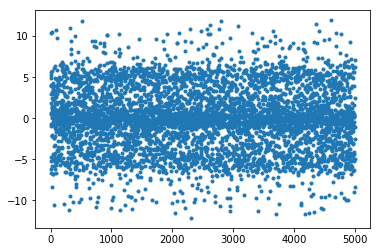

In [74]:
plt.figure()
plt.plot(est_a, '.')
plt.show()

In [108]:
np.linspace(-12.5,12.5,26)

array([-12.5, -11.5, -10.5,  -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,
        -3.5,  -2.5,  -1.5,  -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,
         5.5,   6.5,   7.5,   8.5,   9.5,  10.5,  11.5,  12.5])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


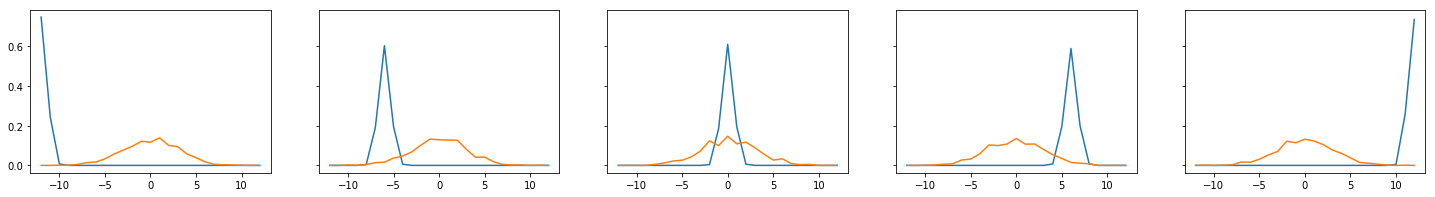

In [110]:
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(25,3))
for i in range(len(pos)):
    hist_v, _ = np.histogram(x_v[:,i], bins=np.linspace(-12.5,12.5,26), density=True)
    #print(np.shape(hist_v))
    #print(np.sum(hist_v))
    hist_a, _ = np.histogram(x_a[:,i], bins=np.linspace(-12.5,12.5,26), density=True)
    #print(np.shape(hist_a))
    axes[i].plot(np.linspace(-12,12,25), hist_v)
    axes[i].plot(np.linspace(-12,12,25), hist_a)
    axes[i].legend()
plt.show()

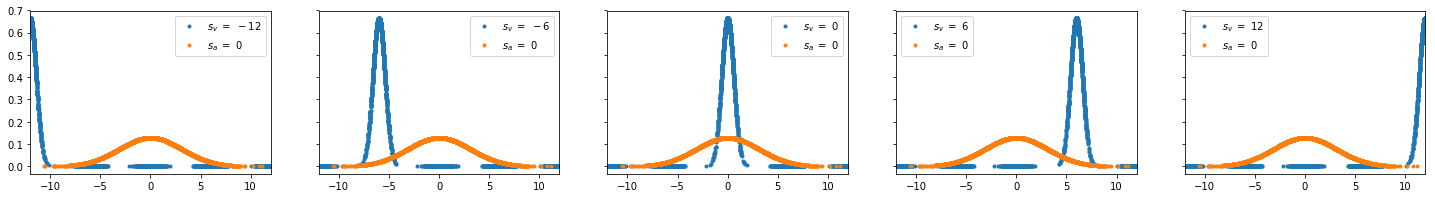

In [114]:
pdf_x_v = []
pdf_x_a = []
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(25,3))
for i in range(len(pos)):
    pdf_v = dists.norm.pdf(x_v.reshape(samples*len(pos)), loc=pos[i], scale=sigma_v0)
    pdf_a = dists.norm.pdf(x_a.reshape(samples*len(pos)), loc=0, scale=sigma_a0)
    pdf_x_v.append(pdf_v)
    pdf_x_a.append(pdf_a)
    axes[i].plot(x_v.reshape(samples*len(pos)), pdf_v,'.', label=r'$s_v\ =\ %d$'%pos[i])
    axes[i].plot(x_a.reshape(samples*len(pos)), pdf_a, '.', label=r'$s_a\ =\ %d$'%0)
    axes[i].legend()
    axes[i].set_xlim(-12, 12)
plt.show()

In [62]:
# Estimate
est_v, est_a = estimates(x_v, x_a)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


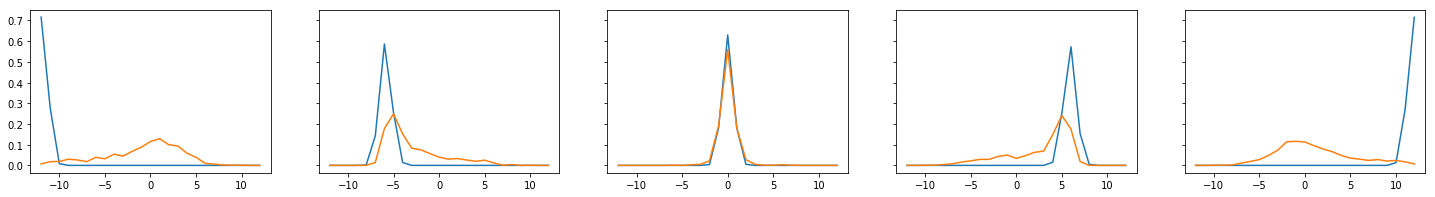

In [115]:
fig, axes = plt.subplots(1, 5, sharey=True, figsize=(25,3))
for i in range(len(pos)):
    est_v, est_a = estimates(x_v[:,i], x_a[:,i])
    hist_v, _ = np.histogram(est_v, bins=np.linspace(-12.5,12.5,26), density=True)
    #print(np.shape(hist_v))
    #print(np.sum(hist_v))
    hist_a, _ = np.histogram(est_a, bins=np.linspace(-12.5,12.5,26), density=True)
    #print(np.shape(hist_a))
    axes[i].plot(np.linspace(-12,12,25), hist_v)
    axes[i].plot(np.linspace(-12,12,25), hist_a)
    axes[i].legend()
plt.show()

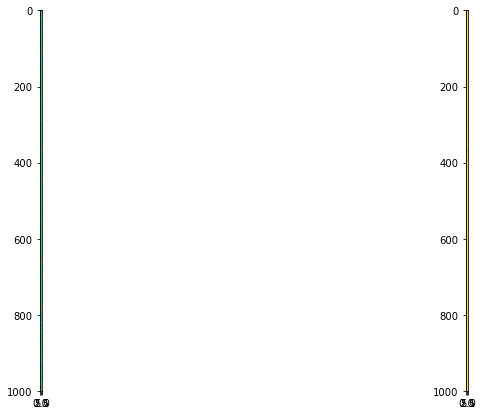

In [96]:
plt.figure()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.imshow(vv)
ax2.imshow(aa)
plt.show()

## 2. Fit the model to experimental data

In [116]:
samples = 10000
# Determine C=1 or C=2
C = np.random.binomial(1, p_com0, size=samples)
# The output of the binomial is the number of successes given n.
# Thus C=1 one common cause; C=0 two independent causes

In [120]:
num_C1 = C.sum()
s = np.random.normal(0, sigma_p0, num_C1)
s_v = np.random.normal(0, sigma_p0, samples-num_C1)
s_a = np.random.normal(0, sigma_p0, samples-num_C1)

In [157]:
def cont_to_disc(s):
    intervals = [-100, -9, -3, 3, 9, 100]
    s_disc = s.copy()
    for i in range(len(intervals)-1):
        a, b = intervals[i], intervals[i+1]
        mask = np.logical_and(s>=a, s<b)
        s_disc[mask] = pos[i]
    return s_disc

In [159]:
# Generate sources
s = cont_to_disc(s)
s_v = cont_to_disc(s_v)
s_a = cont_to_disc(s_a)

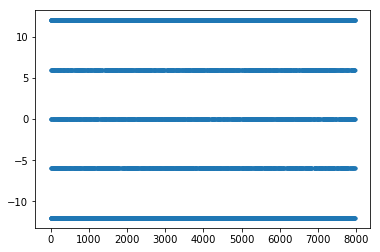

In [161]:
plt.plot(s, '.')

In [49]:
# Obtain estimates of p(sˆa|sv,sa) and p(sˆv|sv,sa)

In [31]:
p_coms

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ])

package emcee

package corner